# Euler puede fracasar: sistemas con leyes de conservación

El método de Euler es sencillo y útil, pero tiene un defecto importante: ¡puede fracasar!, o sea, no integra correctamente las EDOs. De hecho, resulta que *casi siempre fracasa*, no sólo cuantitativamente, sino también cualitativamente.

Por ejemplo, consideremos la ecuación del péndulo para ángulos pequeños, o sea, un oscilador armónico simple, ahora *sin* amortiguamiento.

In [58]:
using Plots
gr(fmt=:png)

Plots.GRBackend()

In [59]:
using Interact

#### Ejercicio 1

(i) Escribe la ecuación de movimiento del oscilador armónico simple, en términos del ángulo $\theta$ del péndulo desde el vertical, y la velocidad angular $\omega$.

$$\frac{d^2\theta}{dt^2}+\frac{g}{l}\theta=0 \cdots (1)$$ 
con $w^2=\frac{g}{l}$


(ii) Dibuja el campo vectorial.

In [60]:
ts = -10:10
xs = -10:10

tts = [t for t in ts for x in xs]
xxs = [x for t in ts for x in xs];
                        

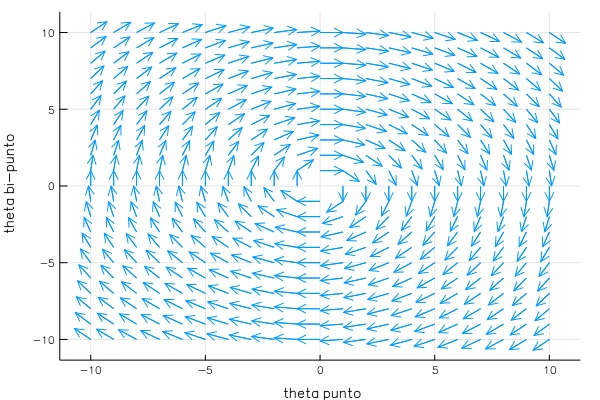

In [61]:
ω=1
f(x, z) = -x*ω^2
g(x,z)=z

df(x,z) = normalize([g(x,z),f(x,z)])

quiver(tts, xxs, quiver=df,ylabel=(" theta bi-punto"),xlabel=(" theta punto"))

(ii) Integra la ecuación utilizando el método de Euler dibuja bastantes trayectorias en el espacio fase  $(\theta, \omega)$, empezando desde distintas condiciones iniciales.
 ¿Tienen sentido físico? ¿Por qué?

In [62]:
function paso_euler(f,x,t,h) 
    return     x+f(x,t)*h
end
function euler(f,x0,t0,tf,h)
    #if(length(f(x0,1))==length(x0))
   
    t = t0:h:tf
    m=length(x0)
    n=length(t)
    x=zeros((n,m))
    x[1,:]=x0
    for i in 2:length(t)
            x[i,:]=paso_euler(f,x[i-1,:],t[i-1],h)#despues de tratar bastantes casos
                                  #me di cuenta que al mandar la funcion como vector y
                        # x como vector marca error  si se manda x como Int64 
        end
  
    return t,x
end

euler (generic function with 1 method)

In [63]:
u(x,t)=[x[2],-x[1]*ω^2]
p=plot(title=("Solucion para distintas condiciones iniciales"),ylabel=("omega"),xlabel=("theta"));

In [64]:
for i in 1:10
s=10-i/2
x0 = [s, 0]     
t0 = 0
h = 0.1
t, x = euler(u,x0,t0,100,h)
p=plot!(x[:,1],x[:,2],label=("angulo inicial $s"))
end

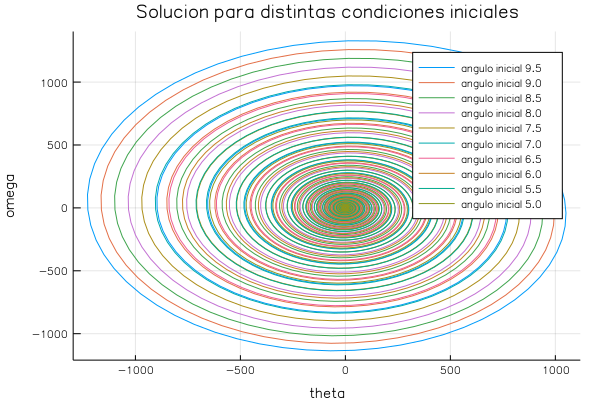

In [65]:
p

(iii) Recuerda que este sistema físico tiene una propiedad especial: existe una **ley de conservación**. ¿Cuál es la cantidad física que se conserva? Escríbela en términos de $\theta$ y $\omega$.

la cantidad que se conserva es la energía, y sabemos que si hay una simetria en el tiempo por el teorema de Noether que hay una simetria continua implica una conservacion de una cantidad física. veamos que si hay conservación en el tiempo y por ser en el tiempo la cantidad conservada es la energia.
De la ecuación (1) tenemos que.
$$\dot{\theta} \ddot{\theta}=-\omega^2 \dot{\theta}\theta$$
integrando por partes tenemos que
$$\frac{d}{dt}(\frac{1}{2}\dot{\theta}^2)=-\omega^2\frac{d}{dt}(\frac{1}{2}\theta^2)$$
lo que implica que:
$$\frac{d}{dt}(\dot{\theta}^2+\omega^2\theta^2)=0\Rightarrow \dot{\theta}^2+\omega^2\theta^2=cte$$

(iv) Dado que esta cantidad se conserva, ¿qué debe satisfacer una trayectoria que sale de una condición inicial dada? [Pista: piensa en **curvas de nivel**.] ¿Por qué? ¿Puedes escribir una ecuación que describe cómo evoluciona la cantidad conservada a lo largo del tiempo?

Utiliza `contour` para dibujar curvas de nivel, y compáralos gráficamente con las trayectorias que da Euler. ¿Qué observas?

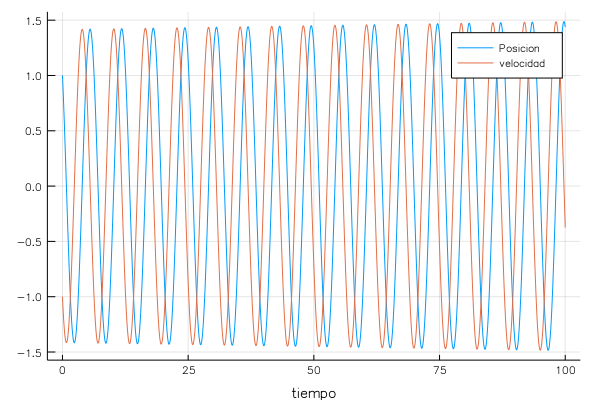

In [66]:
x0 = [1, -1]     
t0 = 0
h = 0.001
t, x = euler(u,x0,t0,100,h)
plot(t,x[:,1],label=("Posicion"),xlabel=("tiempo"))
plot!(t,x[:,2],label=("velocidad"))

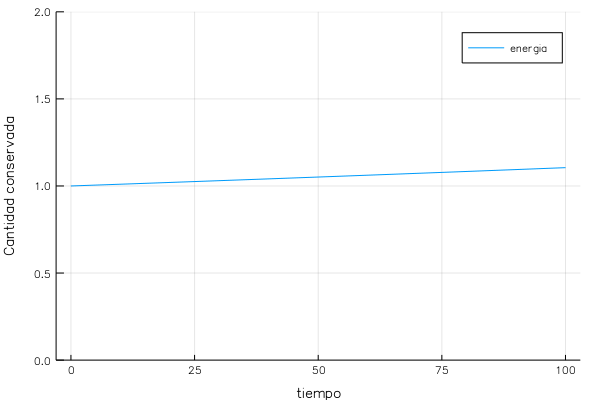

In [67]:
plot(t,0.5.*x[:,2].^2+(0.5*ω^2).*x[:,1].^2,ylabel=("Cantidad conservada"),
    xlabel=("tiempo"),ylim=(0,2),label=("energia"))

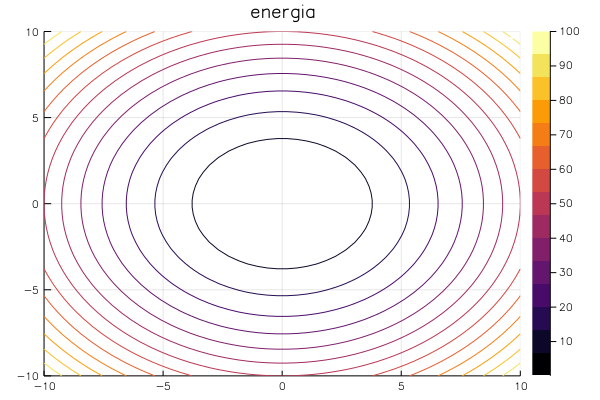

In [68]:
#ahora a hacerlo con countour
θp=linspace(-10,10,50)
θsp=linspace(-10,10,50)
ϵ=[0.5*tetap^2+0.5*ω^2*teta^2 for teta in θsp,tetap in θp]
contour(θsp,θp,ϵ,title=("energia"))

(v) Calcula numéricamente cómo varía la cantidad "conservada" a lo largo de una trayectoria calculada con Euler. ¿Qué ocurre?

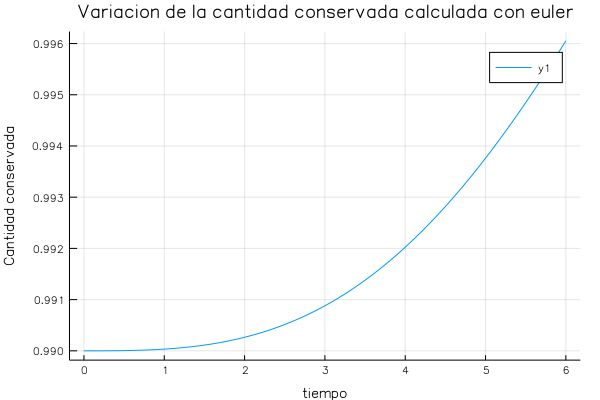

In [69]:
cte=1
v(x,t)=[x[2]^2,cte-x[1]*ω^2]
x0 = [0.99, 0]     
t0 = 0
h = 0.001
t1, x1 = euler(v,x0,t0,6,h)
plot(t1,x1[:,1],title=("Variacion de la cantidad conservada calculada con euler"),ylabel=("Cantidad conservada"),
xlabel=("tiempo"))

# El método de Euler-Cromer

Un cambio aparentemente insignificativo al método numérico puede dar resultados mucho mejores para ciertas clases de sistema.

En el llamado método de Euler-Cromer, actualizamos
*primero* la velocidad, y utilizamos esta *nueva* velocidad para actualizar la posición en las reglas usuales del método de Euler.

Ahora tenemos un sistema de segundo orden $\ddot{y}=f(x,t)$, para lo cual redefinimos $y=:x$ y por otro lado $\Rightarrow \dot{y}=:z$, lo cual nos dejaria elsiguiente sistema:
$$\dot{z}=f(x,t)$$
$$\dot{x}=z$$
Con lo que tenemos que 
$$\dot{y}(t+h)=\dot{y}(t)+hf(y,t)$$
$$y(t+h)=y(t)+h\dot{y}(t+h)$$
llamado euler-cromer

#### Ejercicio 2

(i) Aplica el método de Euler-Cromer al oscilador armónico. [Haz una versión nueva de tu código de Euler para 2 variables.] Dibuja trayectorias desde varios puntos iniciales en un solo plano fase, junto con las curvas de nivel y campo vectorial correspondientes.

In [70]:
function eulercro(f,g,x0,y0,t0,tf,h)
     #h=abs(tf-t0)/n
    
    ts = t0:h:tf
    x = zeros(length(ts))
    y = zeros(length(ts))
    x[1] = x0
    y[1] = y0
    for i in 1:length(ts)-1
        
        y[i+1] = h * g(x[i], y[i]) + y[i]
        x[i+1] = h * f(x[i], y[i+1]) + x[i]
    end
    return ts, x, y
end 


eulercro (generic function with 1 method)

In [71]:

o=0.6
f1(x, y) = y
g1(x, y) =  - (o^2 * x)
gra=plot(title=("solucion es espacio fase para distintas condiciones iniciales"))
for i in 1:20
    s=30-i
x0=s
y0=0
h = 0.4
t0=0
t2, x2, y2 = eulercro(f1,g1, x0, y0, t0,t0+10,h)
gra=plot!(x2,y2,label=("Condicion inicial $s"))
end

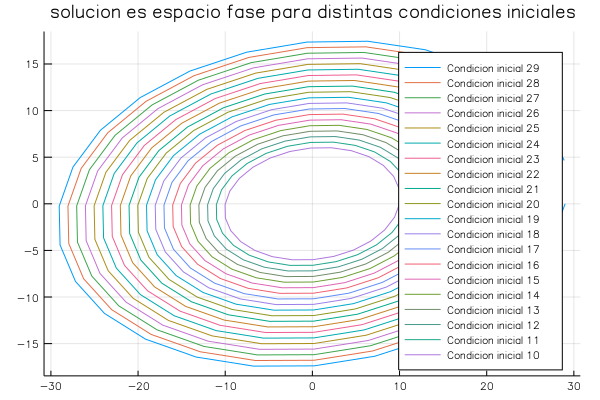

In [72]:
gra

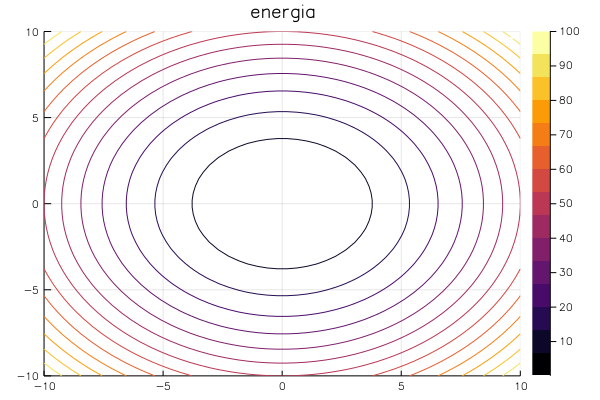

In [73]:
θp=linspace(-10,10,50)
θsp=linspace(-10,10,50)
ϵ=[0.5*tetap^2+0.5*ω^2*teta^2 for teta in θsp,tetap in θp]
contour(θsp,θp,ϵ,title=("energia"))

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_38", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-a06c0590-fa5c-465e-b4da-6e89203d4848", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 21),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 2),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, 5)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_37", 13, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/luismartinezrojas/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":13}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {
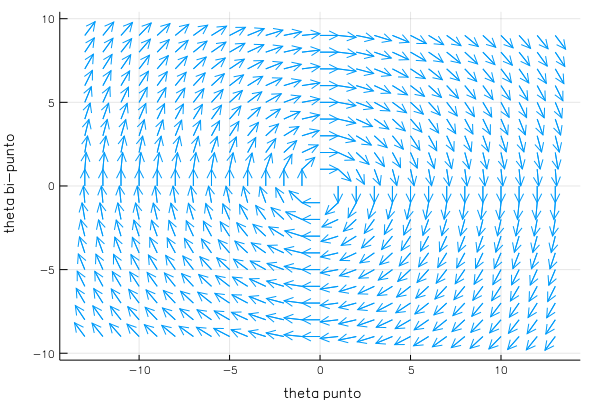
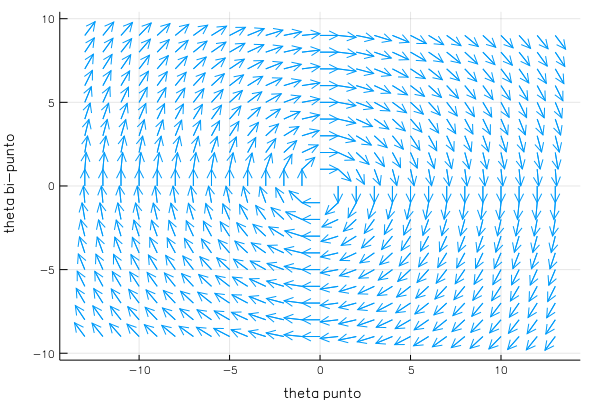

In [74]:
@manipulate for i in 5:2:21, j in 3:2:15, ω in 0.1:0.1:2
ts = -1*i:i
xs = -1*j:j

tts = [t for t in ts for x in xs]
xxs = [x for t in ts for x in xs];
                        
f(x, z) = -(x)*ω^2
g(x,z)=z

df(x,z) = normalize([g(x,z),f(x,z)])

quiver(tts, xxs, quiver=df,ylabel=(" theta bi-punto"),xlabel=(" theta punto"))
                        end

(ii) Encuentra la tasa de convergencia de Euler_cromer a la solución exacta cuendo el tamaño $h$ de un paso converge a cero. ¿Cómo se compara con la tasa de convergencia del método de euler?

La solución exacta será de la forma 
$$y=x0*cos(wt+\phi)$$
pero para este caso el desfase $\phi=0$, con lo que la solución quedará de manera tal a la aproximación que conforme  converge $h\rightarrow 0$ el siguiente grafico:

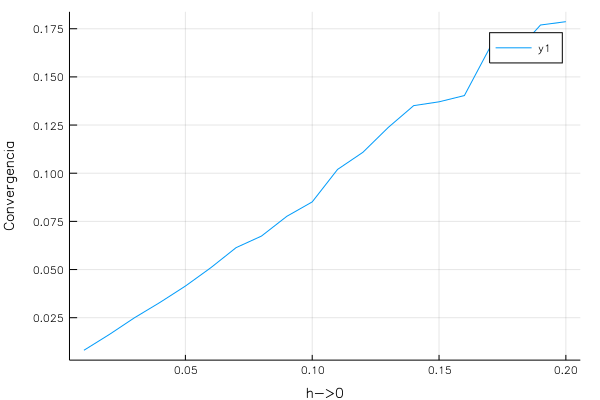

In [75]:
#convergencia h->0
tiem=[]
conv=[]
for h in 0.01:0.01:0.2
    tiem=0.01:0.01:0.2
d=0
x0=5
y0=0

t0=0
t3, x3, y3 = eulercro(f1,g1, x0, y0, t0,t0+20,h)
    d=abs(x0*cos(o*t3[end])-x3[end])  
    push!(conv,d)
end
   plot(tiem,conv,xlabel=("h->0"),ylabel=("Convergencia")) 

#### Ejercicio 3

(i) Escribe la EDO que describe un péndulo simple. ¿Cuál cantidad se conserva?

la ecuacion de un pendulo simple esta de manera muy similar a la del oscilador armonico dada por:
$$\frac{d^2\theta}{dt^2}+\frac{g}{l}sin(\theta)=0$$
análogo al caso del oscilador armonico tenemos que ahora para este caso se conservara
$$H=\frac{1}{2} ml^2\omega^2-mgl\cos(theta)$$

(ii) Aplica Euler-Cromer a este sistema y dibuja bastantes trayectorias en el espacio fase, junto con curvas de nivel y el campo vectorial correspondientes.

In [76]:
ω=0.5
u2(x,y)=y
h2(x,y)= -(ω^2) *sin(x)
p2=plot(title=("Solucion para distintas condiciones iniciales pendulo simple"),ylabel=("theta punto"),xlabel=("theta"));

In [77]:

for i in 1:70
    s=100-i
x0=s
y0=0
h = 0.4
t0=0
t2, x2, y2 = eulercro(u2,h2, x0, y0, t0,t0+100,h)
p2=plot!(x2,y2,label=("Condicion inicial $s"))
end

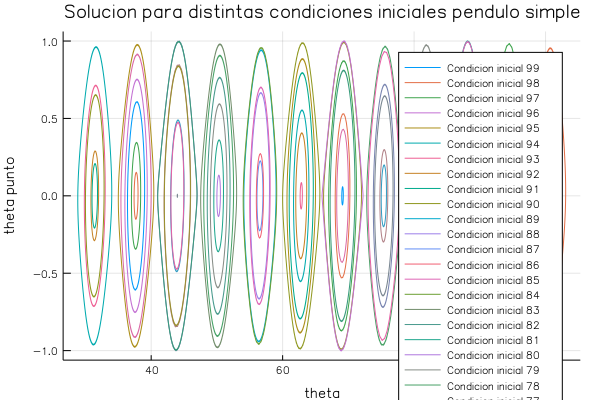

In [78]:
p2

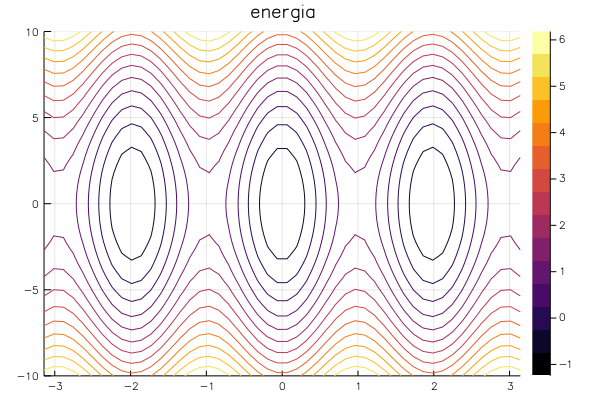

In [79]:
θp=linspace(-10,10,50)
θsp=linspace(-pi,pi,50)
ϵ=[0.5*tetap^2-5*ω^2*cos(teta) for tetap in θsp,teta in θp]
contour(θsp,θp,ϵ,title=("energia"))

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_50", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-75e77082-2705-448c-bc2c-a6de76ca13b0", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 21),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 2),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, 5)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_49", 13, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/luismartinezrojas/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":13}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {
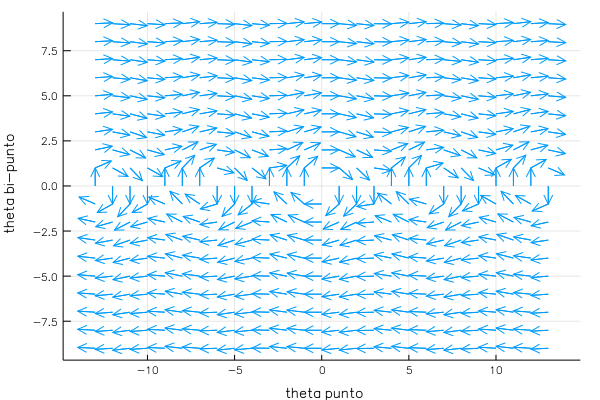
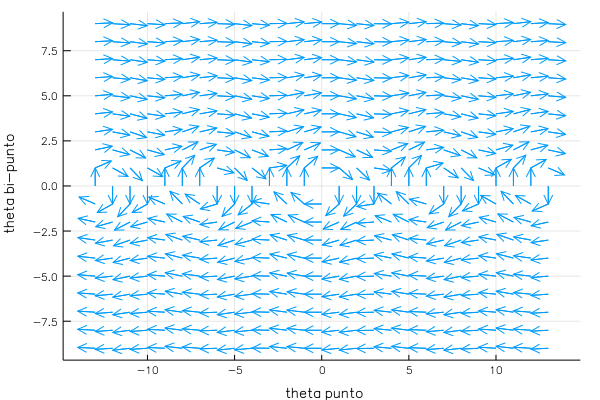

In [80]:
@manipulate for i in 5:2:21, j in 3:2:15, ω in 0.1:0.1:2
ts = -1*i:i
xs = -1*j:j

tts = [t for t in ts for x in xs]
xxs = [x for t in ts for x in xs];
                        
f(x, z) = -sin(x)*ω^2
g(x,z)=z

df(x,z) = normalize([g(x,z),f(x,z)])

quiver(tts, xxs, quiver=df,ylabel=(" theta bi-punto"),xlabel=(" theta punto"))
                        end

(iii) Dibuja el comportamiento de las dos componentes en función del tiempo.

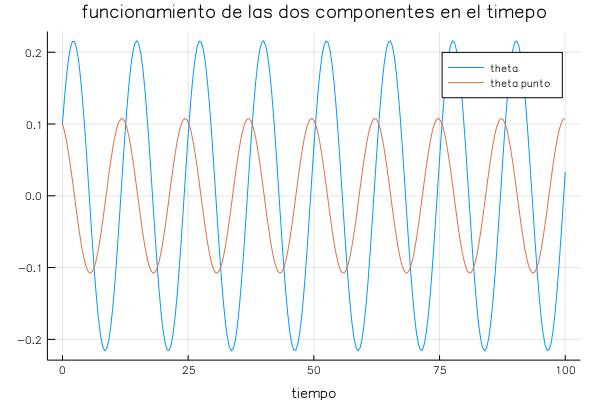

In [81]:
ω=0.5
fun2(x,y)=y
gun2(x,y)= -(ω^2) *sin(x)
x0=0.1
y0=0.1
h = 0.4
t0=0
tr, xr, yr = eulercro(fun2,gun2, x0, y0, t0,t0+100,h)
plot(tr,xr,title="funcionamiento de las dos componentes en el timepo",
label="theta",xlabel="tiempo")
plot!(tr,yr,label="theta punto")

 

(iv) Resume el comportamiento físico del sistema.

Se resume como un sistema conservativo salvo el error númerico que no hace que las cantidades se conserven y, en las curvas que se vencerradas serán los estados ligados  si logra salir de estas curvas de estados ligados se superara el ángulo y el pendulo se podra dar la vuelta

(v) Hay regiones (puntos, curvas, etc.) especiales en el espacio fase? ¿Cuáles son, y a qué corresponden físicamente?

si observamos las curvas de nivel observamos punto de estabilidad de de energia que corresponde a como lo hicimos en el curso de ecuaciones diferenciales, todo punto tiende  a caer a estos minimos estables de energía, que es el equilibrio estatico

# El método de Euler para atrás

Tomemos otro punto de vista de los métodos numéricos para las EDOs.

Al integrar los dos lados de la EDO

$$\dot{x}(t) = f(x(t), t)$$

con respecto al tiempo para $t$ entre $t_0$ y $t_0+h$, obtenemos

$$x(t_0+h) - x(t_0) = \int_{t_0}^{t_0+h} f(x(t'), t') \, dt'.$$

Por lo tanto, podemos intentar aplicar los métodos numéricos que ya vimos para calcular integrales definidas a este problema.

#### Ejercicio 4

(i) ¿A cuál método de integración numérica corresponde el método de Euler? - es decir, ¿cómo se aproxima la función $f$ adentro de la integral?

corresponde a los metodos de integración implicita, que para resolver un punto  necesitamos usar ese mismo punto, por lo que aproximamos es punto por medio de:
$$ \int_{t_0}^{t_0+h}f(x)dx = f(\epsilon)h \quad \epsilon \in[t_0,t_0+h]$$

Ahora aproximamos nustra integral con un rectangu de altura $f(x(t_{0}), t_{0})$ y base $h$, y como esta integral ya no depende de las variables originales el sistema ha quedado:

$$ \int_{t_0}^{t_0+h} f(x(t), t)dt \approx f(x(t_{0}), t_{0})h $$

(ii) Supón (para simplicidad) que $f$ no depende explícitamente de $t$ y escribe una fórmula analítica de cómo sería un paso del método del trapecio a la integral para encontrar una ecuación para $x(t_0 + h)$. ¿Qué *tipo de* ecuación resulta?

Ahora como estamos suponoiendo por simplicidad que $f$ no depende explicitamente de t, utilizando el método del trapecio, esto es tomar una base que en este caso es $h$ y una altura como el punto medio (pues asi es el del trapecio), teniendo así 
$$ \int_{t_0}^{t_0+h} f(x(t), t)dt \approx \frac{1}{2}[f(x(t_{0}), t_{0})+f(x(t_{0}+h), t_{0}+h)]h $$
recordando claramente $x(t_{0}+h)=:x_{n+t}$
entonces tenemos
$$x_{n+1}-x_n=\frac{1}{2}[f(x_{n+1},t_{n+1})+f(x_n,t_n)]$$
Con lo que podriamos definir otra funcion $F$
$$F(x_{n+1},t)=x_{n+1}-x_n-\frac{1}{2}[f(x_{n+1},t_{n+1})+f(x_n,t_n)]=0$$

(iii) ¿Cuál método numérico podemos aplicar para resolver esta ecuación?

Como habiamos visto en los primeros notebooks cuando tenemos una función tq $F(x,t)=$ es una función que encuentra raices que es el método de newton que ya habiamos hecho

(iv) Implementa esto y pruébalo. Compara los resultados con los del método de Euler. ¿Converge más rápido?

In [82]:
function aproxdif(f,x,h)   
    
    return (f(x+h)-f(x))/h  
end

aproxdif (generic function with 1 method)

In [83]:
function newton(f,x0,h)
    d=1
    err=0.001
    
    i=0
    while err<d 
        x = x0 - f(x0)/aproxdif(f,x0,h) #para no calcular la derivada, agregamos función para aproximarla
        d= abs(x-x0)
        
    
        x0=x
        i=i+1    
        if i >= 1000 
              println("No se encontró la raíz despues de 1000 de iteraciones")        
            break
        end
        end
    return x0
        
end

newton (generic function with 1 method)

In [84]:
function eu_newton(f,x0,t0,tf,h)
    t=[]
    while t0<=tf
        push!(t,t0)
        t0=t0+h
    end
    
    posx=zeros(size(t))
    for i in 1:length(t)
        posx[i]=x0
        F(x) =  posx[i]-x + 0.5*h*(f(posx[i], t[i]) + f(posx[i]+h, t[i]+h))
        x0=newton(F, x0,h) 
    end 
    return t,posx  
end

eu_newton (generic function with 1 method)

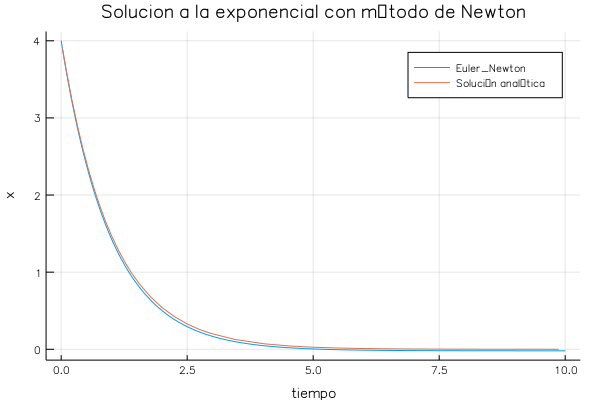

In [85]:
ty(x,t)= -x
fffff(x)=4*exp(-x)
tiem,pos=eu_newton(ty,4,0,10,0.04)
plot(tiem,pos,title=("Solucion a la exponencial con método de Newton"),ylabel=("x"),xlabel=("tiempo"),
label="Euler_Newton")
plot!(fffff,0,10, label="Solución analítica")

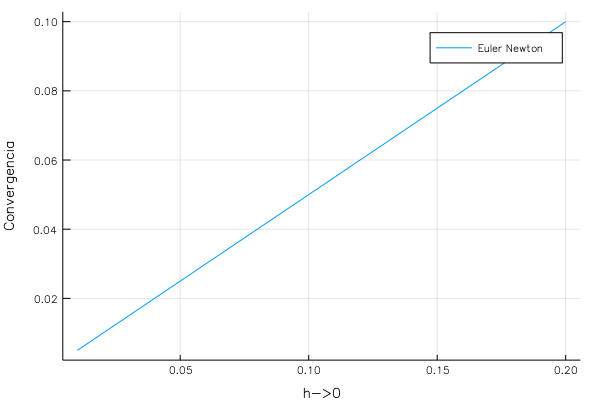

In [86]:
ti=[]
co=[]
for h in 0.01:0.01:0.2
    ti=0.01:0.01:0.2
r=0
x0=5


t0=0
t4, x4 = eu_newton(ty, x0, t0,t0+20,h)
    r=abs(x0*exp(-t4[end])-x4[end])  
    push!(co,r)
end
plot(ti,co,xlabel=("h->0"),ylabel=("Convergencia"),label="Euler Newton") 

(v) ¿Cómo se puede aplicar para sistemas con dos variables?

al igual que el caso de una variable ahora se tiene quepara dos variables:
$$ \int_{t_0}^{t_0+h} f(x(t), t)dt \approx f(x(t_{0}), t_{0})h $$
$$ \int_{t_0}^{t_0+h} g(x(t), t)dt \approx g(x(t_{0}), t_{0})h $$
con lo que ahora se tiene
$$ \int_{t_0}^{t_0+h} f(x(t), t)dt \approx \frac{1}{2}[f(x(t_{0}), t_{0})+f(x(t_{0}+h), t_{0}+h)]h $$
$$ \int_{t_0}^{t_0+h} g(x(t), t)dt \approx \frac{1}{2}[g(x(t_{0}), t_{0})+g(x(t_{0}+h), t_{0}+h)]h $$
recordando claramente $x(t_{0}+h)=:x_{n+t}$
entonces tenemos
$$x_{n+1}-x_n=\frac{1}{2}[f(x_{n+1},t_{n+1})+f(x_n,t_n)]$$
Con lo que podriamos definir otra funcion $F y G$
$$F(x_{n+1},t)=x_{n+1}-x_n-\frac{1}{2}[f(x_{n+1},t_{n+1})+f(x_n,t_n)]=0$$
$$G(x_{n+1},t)=x_{n+1}-x_n-\frac{1}{2}[f(x_{n+1},t_{n+1})+f(x_n,t_n)]=0$$
y asi mandar a solucionar las dos como el método de Euler-Cromer 